# 신경망 모델

간단하게 분류와 회귀에 쓸 수 있는 다층 퍼셉트론(Multilayer perceptrons,MLP)을 다룸. 다층 퍼셉트론은 피드포워드 신경망, 또는 그냥 신경망이라고 함. MLP는 여러 단계를 거쳐 결정을 만들어 내는 선형 모델의 일반화된 모습이라고 볼 수 있음.

In [2]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
#한글 폰트사용
from matplotlib import font_manager, rc
font_name =font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

from sklearn.model_selection import train_test_split as tts

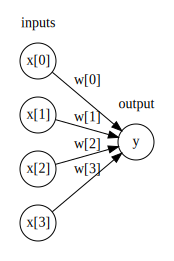

In [3]:
display(mglearn.plots.plot_logistic_regression_graph())

위 그림은 입력 특성과 예측은 노드로, 계수는 노드 사이의 연결로 나타낸 로지스틱 회귀이다.

MLP 에서는 가중치 합을 만드는 과정이 여러 번 반복되며, 먼저 중간 단계를 구성하는 은닉 유닛을 계산하고 이를 이용하여 최종 결과를 산출하기 위해 다시 가중치 합을 계산한다.

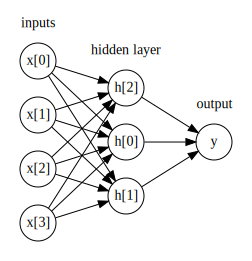

In [4]:
display(mglearn.plots.plot_single_hidden_layer_graph())

이런 모델은 많은 계수를 학습해야 한다. 이 계수는 각 입력과 은닉층의 은닉 유닛 사이, 그리고 각 은닉 유닛과 출력 사이마다 있다.

여러 개의 가중치 합을 계산하는 것은 수학적으로 보면 하나의 가중치 합을 계산하는 것과 같다. 그래서 이 모델을 선령 모델보다 강력하게 만들려면 또 다른 기교가 필요함. 각 은닉 유닛의 가중치 합을 계산한 후 그 결과에 비선형 함수인 **렐루**나 **하이퍼볼릭 탄젠트**를 적용함. 이 함수 결과의 가중치 합을 계산하여 출력을 만든다. 렐루 함수는 0이하를 잘라버리고, tanh 함수는 낮은 입력값에 대해서는 -1 로 수렴하고 큰 입력값에 대해서는 +1 로 수렴함. 이런 비선형 함수를 이용해 신경망이 선형 모델에서보다 뤌씬 더 복잡한 함수를 학습할 수 있다.

Text(0, 0.5, 'relu(x), tanh(x)')

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


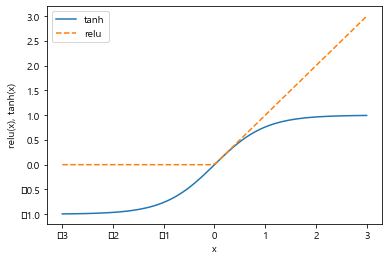

In [5]:
line = np.linspace(-3,3,100)
plt.plot(line, np.tanh(line), label='tanh')
plt.plot(line, np.maximum(line,0), linestyle='--', label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel("relu(x), tanh(x)")

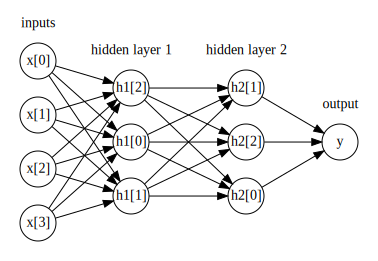

In [6]:
mglearn.plots.plot_two_hidden_layer_graph()

# 신경망 튜닝

Text(0, 0.5, 'feature 1')

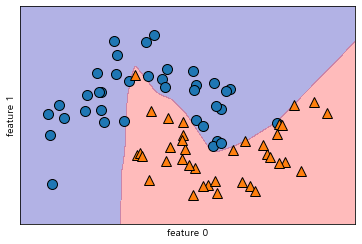

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=100, noise=.25, random_state=3)
X_train, X_test, y_train, y_test = tts(X,y,stratify=y,random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

위 그림을 보면 신경망은 매우 비선형적이지만 비교적 매끄러운 결정경계를 만들었다. MLP는 기본값으로 은닉 유닛 100개를 사용하는데 이런 작은 데이터셋에는 너무 많이 사용하는 걸로 볼 수 있다. 은닉 유닛의 개수를 줄여도(모델의 복잡도는 낮아짐) 여전히 좋은 결과를 얻을 수 있다.

Text(0, 0.5, 'feature 1')

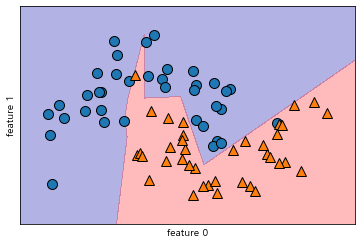

In [8]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

은닉 유닛이 10개여서 결정 경계가 조금 더 날카로워짐. 기본 비선형 함수는 렐루 함수이다. 은닉층이 하나이므로 결정 경계를 만드는 함수는 직선 10개가 합쳐져서 구성된다. 더 매끄러운 결정 경계를 원한다면 은닉 유닛을 추가하거나, 은닉층을 추가하거나, 또는 tanh 함수를 사용할 수 있다.

Text(0, 0.5, 'feature 1')

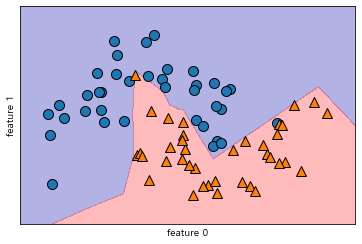

In [9]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

10개의 은닉 유닛을 가진 두개의 은닉층과 렐루 활정화 함수로 만든 결정 경계

Text(0, 0.5, 'feature 1')

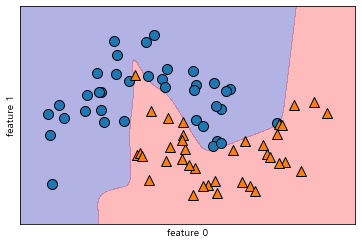

In [10]:
# tanh 활성화 함수가 적용된 10개의 유닛으로 된 두 개의 은닉층
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train,y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train)
plt.xlabel("feature 0")
plt.ylabel("feature 1")

그리고 리지 회귀와 선형 분류기에서 한 것처럼 L2 페널티를 사용해서 가중치를 0에 가깝게 감소시켜 모델의 복잡도를 제어할 수 있다. MLPClassifier에서 이런 역할을 하는 매개변수는 alpha이고 기본값은 매우 낮게 되어 있다.

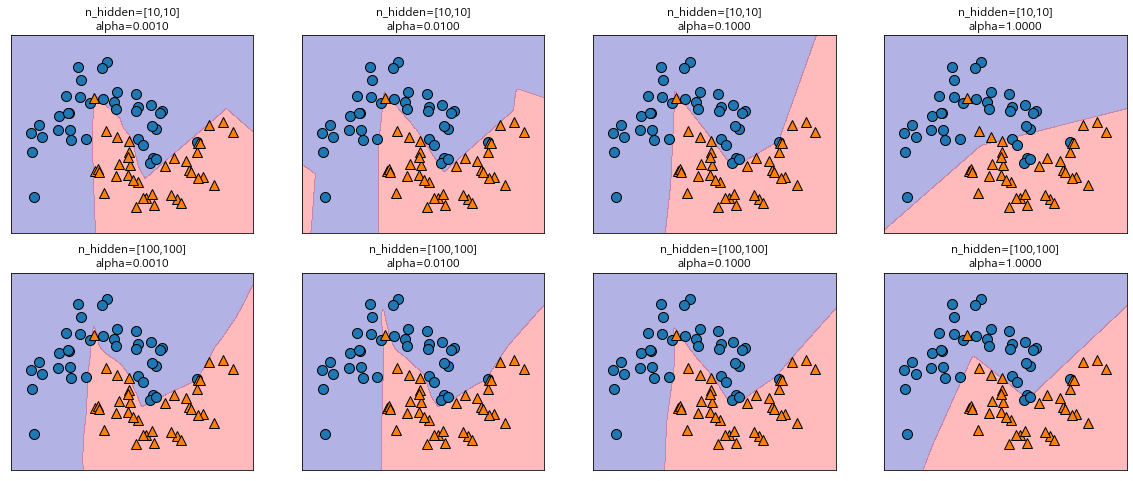

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(20,8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes], alpha=alpha)
        mlp.fit(X_train,y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train, ax=ax)
        ax.set_title("n_hidden=[{},{}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

신경망에서는 학습을 시작하기 전에 가중치를 무작위로 설정하며 이 무작위한 초기화가 모델의 학습에 영향을 준다.

In [12]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("유방암 데이터의 특성별 최댓값:\n", cancer.data.max(axis=0))

유방암 데이터의 특성별 최댓값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [13]:
X_train, X_test, y_train, y_test = tts(cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print('train set accuracy: {:.2f}'.format(mlp.score(X_train, y_train)))
print('test set accuracy: {:.2f}'.format(mlp.score(X_test, y_test)))

train set accuracy: 0.94
test set accuracy: 0.92


MLP의 정확도는 꽤 높지만 다른 모델만큼은 아님. 앞서 SVC 예제에서는 데이터의 스케일이 영향을 미침. 이와 비슷하게 신경망도 모든 입력 특성을 평균은 0, 분산은 1이 되도록 변형하는 것이 좋다. 

In [14]:
# 훈련 세트 각 특성의 평균을 계산함.
mean_on_train = X_train.mean(axis=0)
# 훈련 세트 각 특성의 표준 편차를 계산함.
std_on_train = X_train.std(axis=0)

# 데이터에서 평균을 빼고 표준 편차로 나누면 평균이 0, 표준 편차가 1인 데이터로 변환됨.
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print('train set accuracy: {:.2f}'.format(mlp.score(X_train_scaled, y_train)))
print('test set accuracy: {:.2f}'.format(mlp.score(X_test_scaled, y_test)))

train set accuracy: 0.99
test set accuracy: 0.97


C:\Users\NT500R\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


스케일을 조정하니 결과가 매우 좋아졌으며 다른 모델의 성능 못지않음. 하지만 경고가 출력되었는데 이는 최대 반복 횟수에 도달했다고 알려주는 것이다. 이는 모델을 학습시키는 adam 알고리즘에 관련한 것으로 이 경고가 나오면 반복 횟수를 늘려야 함.

In [15]:
mlp = MLPClassifier(max_iter = 1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print('train set accuracy: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('test set accuracy: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

train set accuracy: 1.000
test set accuracy: 0.972


반복 횟수를 늘려서 훈련셋과 테스트셋의 성능을 올림. 하지만 훈련셋과 테스트셋 사이의 성능 차이가 있으므로 일반화 성능을 더 올리기 위해 모델의 복잡도를 낮춰보기로 결정.

In [16]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print('train set accuracy: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('test set accuracy: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))

train set accuracy: 0.988
test set accuracy: 0.972


이 결과는 지금까지 가장 좋은 모델의 성능과 동일함. 신경망이 어떻게 학습하는지 분석할 수 있지만 선형 모델이나 트리 모델보다는 훨씬 까다로움. 

C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\NT500R\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


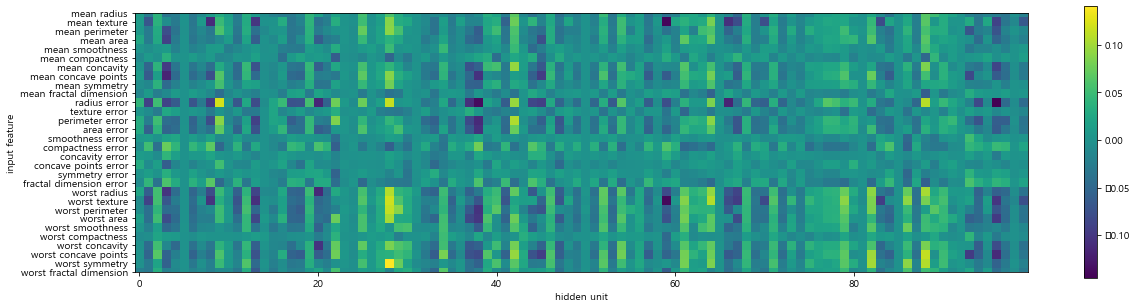

In [17]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30),cancer.feature_names)
plt.xlabel("hidden unit")
plt.ylabel("input feature")
plt.colorbar()

입력과 은닉층 사이의 학습된 가중치를 나타낸 그림이다. 밝은 색은 큰 양수 값을 나타내고 어두운 색은 음수 값을 나타냄. 모든 은닉 유닛에서 작은 가중치를 가진 특성은 모델에 덜 중요하다고 추론 할 수 있다. "smoothness error"와 "fractal dimension error" 사이에 있는 특성과 "mean smoothness"와 "mean compactness"가 다른 특성들보다 가중치가 낮습니다. 이 특성들은 덜 중요하거나 신경망에게 적절하게 입력되지 않았을 수 있음.

# 장단점과 매개변수

신경망의 중요한 장점은 대량의 데이터에 내재된 정보를 잡아내고 매우 복잡한 모델을 만들 수 있다는 것. 충분한 연산 시간과 데이터를 주고 매개변수를 세심하게 조정하면 신경망은 종종 다른 머신러닝 알고리즘을 뛰어넘는 성능을 낸다. 

단점으로는 크고 강력한 모델은 학습이 오래걸린다. 또한 SVM과 비슷하게 데이터 전처리에 주의해야하고 모든 특성이 같은 의미를 가진 동질의 데이터에서 잘 작동한다. 다른 종류의 특성을 가진 데이터라면 트리기반 모델이 더 잘 작동할 수 있다.

신경망에서가장 중요한 매개변수는 은닉층의 개수와 각 은닉층의 유닛 수이다. 처음엔 한 개 도는 두 개의 은닉층으로 시작해서 늘려가야함. 각 은닉층의 유닛수는 보통 입력 특성의 수와 비슷하게 설정하지만 수천 초중반을 넘는 일은 거의 없음. 

신경망의 매개변수를 조정하는 일반적인 방법은 먼저 충분히 과대적합되어서 문제를 해결할만한 큰 모델을 만든다. 그 다음 훈련 데이터가 충분히 학습될 수 있다고 생각될 때 신경망 구조를 줄이거나 규제 강화를 위해 alpha 값을 증가시켜 일반화 성능을 향상시킴.

solver 매개변수는 모델을 학습시키는 방법 또는 매개변수 학습에 사용하는 알고리즘을 지정할 수 있다. solver 매개변수에는 쉽게 사용할 수 있는 옵션이 두 가지 있다. 기본값은 'adam'으로 대부분의 경우에 잘 작동하지만 데이터의 스케일에 조금 민감함(그래서 데이터를 평균 0, 분산 1로 조정하는게 중요함). 다른 하나는 'lbfgs'로 안정적이지만 규모가 큰 모델이나 대량의 데이터셋에서는 시간이 오래 걸린다. 